C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greate

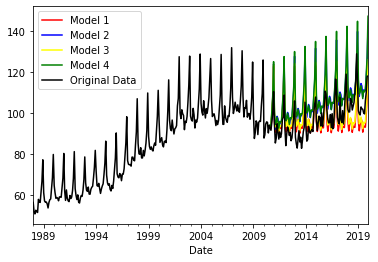

Training Set of Model 1: MSE, MAE and MAPE are (5.574569989988328, 1.7148817434030768, 1.9996585698526919)
Training Set of Model 2: MSE, MAE and MAPE are (5.585452072405356, 1.7082518337491142, 1.9885758639169187)
Training Set of Model 3 MSE, MAE and MAPE are (4.72563088843821, 1.5791868655223655, 1.892743842297191)
Training Set of Model 4: MSE, MAE and MAPE are (4.671172917138801, 1.5683231906624295, 1.8755819393775144)
Test Set of Model 1: MSE, MAE and MAPE are (59.31707725327434, 6.19889440578868, 6.152337484187479)
Test Set of Model 2: MSE, MAE and MAPE are (117.54286041916072, 9.244763355939952, 9.4907263193728)
Test Set of Model 3: MSE, MAE and MAPE are (59.69457203470568, 6.191847479105143, 6.216402868814972)
Test Set of Model 4: MSE, MAE and MAPE are (145.09366143086814, 10.151873817800979, 10.398563441030065)


In [1]:
# -*- coding: utf-8 -*-


#EAFV
from pandas import read_excel
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn import metrics
from statsmodels.tsa.api import ExponentialSmoothing

EAFV = read_excel('EAFVdata_31324878.xls', sheet_name = 'EAFV', header = 0, index_col = 0, parse_dates = True, squeeze = True)


###Choose the potential model to be used

#Create a training and test data set
EAFV_train = EAFV[0:270] 
EAFV_test = EAFV[270:385]

#Basic trial.
from statsmodels.tsa.api import ExponentialSmoothing
#Model 1>> trend: additive; seasonality: additive; seasonal period = 12 (months)
fit1 = ExponentialSmoothing(EAFV_train, seasonal_periods = 12, trend = 'add', seasonal = 'add').fit() #Find the optimised parameter value.
F1 = fit1.forecast(len(EAFV_test)).rename('Model 1') #To forecast over the test set based on result of fit1
#fit1.fittedvalues.plot(color = 'red')
F1.plot(color = 'red', legend = True)
#pyplot.show() 

#Model 2>> trend: multiplicative; seasonality: additive; seasonal period = 12 (months)
fit2 = ExponentialSmoothing(EAFV_train, seasonal_periods = 12, trend = 'mul', seasonal = 'add').fit()
F2 = fit2.forecast(len(EAFV_test)).rename('Model 2')
#fit2.fittedvalues.plot(color = 'blue')
F2.plot(color = 'blue', legend = True)
#pyplot.show() 

#Model 3>> trend: multiplicative; seasonality: multiplicative; seasonal period = 12 (months)
fit3 = ExponentialSmoothing(EAFV_train, seasonal_periods = 12, trend = 'mul', seasonal = 'mul').fit()
F3 = fit3.forecast(len(EAFV_test)).rename('Model 3')
#fit3.fittedvalues.plot(color = 'yellow')
F3.plot(color = 'yellow', legend = True)
#pyplot.show() 

#Model 4>> trend: additive; seasonality: multiplicative; seasonal period = 12 (months)
fit4 = ExponentialSmoothing(EAFV_train, seasonal_periods = 12, trend = 'add', seasonal = 'mul').fit()
F4 = fit4.forecast(len(EAFV_test)).rename('Model 4')
#fit4.fittedvalues.plot(color = 'green')
F4.plot(color = 'green', legend = True)
#pyplot.show() 

#Plot the fitted value, forecasting reuslts and original series data altogether
#Plot original data
EAFV.plot(color = 'black', label = 'Original Data', legend = True)
pyplot.show() 


#Various Errors of Training Set and Test set
#Define a MAPE function
import numpy as np
from sklearn import metrics

def mape(true, pred):
    return np.mean(np.abs((true - pred) / true)) * 100
def errors(true, pred):
    MSE = metrics.mean_squared_error(true, pred)
    MAE = metrics.mean_absolute_error(true, pred)
    MAPE = mape(true, pred)
    return MSE, MAE, MAPE

train_e1 = errors(EAFV_train, fit1.fittedvalues)
train_e2 = errors(EAFV_train, fit2.fittedvalues)
train_e3 = errors(EAFV_train, fit3.fittedvalues)
train_e4 = errors(EAFV_train, fit4.fittedvalues)
print('Training Set of Model 1: MSE, MAE and MAPE are {0}'.format(train_e1))
print('Training Set of Model 2: MSE, MAE and MAPE are {0}'.format(train_e2))
print('Training Set of Model 3 MSE, MAE and MAPE are {0}'.format(train_e3))
print('Training Set of Model 4: MSE, MAE and MAPE are {0}'.format(train_e4))
test_e1 = errors(EAFV_test, F1)
test_e2 = errors(EAFV_test, F2)
test_e3 = errors(EAFV_test, F3)
test_e4 = errors(EAFV_test, F4)
print('Test Set of Model 1: MSE, MAE and MAPE are {0}'.format(test_e1))
print('Test Set of Model 2: MSE, MAE and MAPE are {0}'.format(test_e2))
print('Test Set of Model 3: MSE, MAE and MAPE are {0}'.format(test_e3))
print('Test Set of Model 4: MSE, MAE and MAPE are {0}'.format(test_e4))
